# Scalper's Statistics:  PlayStation 5
### By Lee Thomas, Taylor Johnson, Alex Peña, and Paul Leonard
#### December 2020

##### Import related libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

##### Import data sets

In [2]:
df_ebay = pd.read_csv("./data/fake_ps5_ebay.csv")
df_msrp = pd.read_csv("./data/fake_ps5_msrp.csv")
df_real_ebay = pd.read_csv("./data/ebay_data.csv")

In [3]:
df_ebay.head(5)
df_msrp.head(5)

,date,price
0,1/1/2019,400
1,1/2/2019,400
2,1/3/2019,400
3,1/4/2019,400
4,1/5/2019,400


##### Combine datafames

In [4]:
# consider combining each of the dataframes into one large one called df_ps5
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

### Time History Plot of PS5 Prices

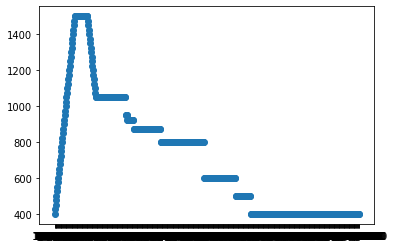

In [5]:
# dates = df_ebay["date"].values
# ebay_price = df_ebay["price"].values
# plt.scatter(dates,ebay_price)

plt.scatter(df_ebay["date"].values,df_ebay["price"].values)
plt.show()

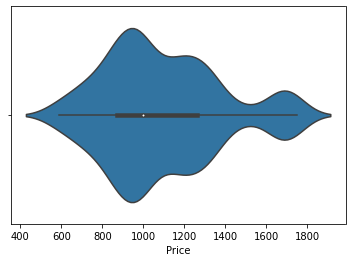

In [9]:
orchestra = sns.violinplot(x=df_real_ebay['Price'], inner='box')

# Monday Violin Plot
### This snapshot of the maket has multiple listing bubbles. The first and most prominent being around \$900-\$1100, followed by \$1100-\$1350, and last being \$1600-\$1800. 

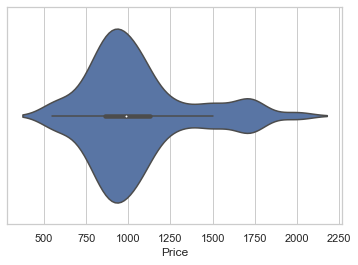

In [21]:
df_ebay_tues = pd.read_csv("./data/ebay_data_tuesday.csv")
sns.set_theme(style='whitegrid')
orchestra = sns.violinplot(x=df_ebay_tues['Price'], inner='box')

# Tuesday Violin Plot
### The massive shift in listing prices from monday to tuesday suggests the supply is catching up to the demand. As the demand catches up, the aftermarket listings will tighten up, and inch closer and closer to the MSRP.